In [1]:
import torch

In [2]:
temp = torch.tensor([[1,2],
                    [3,4]])
temp

tensor([[1, 2],
        [3, 4]])

In [3]:
print(temp.numpy())

[[1 2]
 [3 4]]


In [4]:
temp.shape

torch.Size([2, 2])

In [5]:
temp.view(4,1)

tensor([[1],
        [2],
        [3],
        [4]])

In [6]:
temp.view(-1)

tensor([1, 2, 3, 4])

In [7]:
temp.view(1,-1)

tensor([[1, 2, 3, 4]])

In [8]:
temp.view(-1,1)

tensor([[1],
        [2],
        [3],
        [4]])

In [9]:
and_data = torch.tensor([ [0, 0],
                          [0, 1],
                          [1, 0],
                          [1, 1]], dtype=torch.float32)
and_labels = torch.tensor([ [1],
                            [1],
                            [1],
                            [0]], dtype=torch.float32)

In [10]:
import numpy as np

np.random.randn(3, 224, 224).shape

(3, 224, 224)

In [11]:
import torch.nn as nn

l1 = nn.Linear(2, 1)
x = l1(and_data)
print(x.shape)
torch.relu(x)

act_fn = nn.ReLU()
act_fn(x)

torch.Size([4, 1])


tensor([[0.0000],
        [0.0000],
        [0.2019],
        [0.0620]], grad_fn=<ReluBackward0>)

In [12]:
l1.weight, l1.bias, l1.parameters

(Parameter containing:
 tensor([[ 0.5439, -0.1399]], requires_grad=True),
 Parameter containing:
 tensor([-0.3419], requires_grad=True),
 <bound method Module.parameters of Linear(in_features=2, out_features=1, bias=True)>)

In [13]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        #입력크기 2, 출력크기 1인 선형 레이어 정의함. 
        #self.fc2 = nn.Linear(2,1) 두번째 선형 레이어

    def forward(self, x): #forward - 입력받아서 출력 변환과정을 정의함
        x = self.fc1(x) #입력 x를 첫번째 선형레이어 fc1에 통과시킴. 선형변환 적용됨
        x = self.sigmoid(x) #그 결과에 시그모이드 함수로 변환하여, 0과 1 사이로 이진 확률로 해석나옴
        return x

In [14]:
model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [15]:
model(and_data)

tensor([[0.4655],
        [0.3977],
        [0.5618],
        [0.4929]], grad_fn=<SigmoidBackward0>)

In [16]:
loss_fn = nn.CrossEntropyLoss()

In [17]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [18]:
model = SimpleNN()


In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(and_data)
    loss = loss_fn(outputs, and_labels)
    print('loss', loss)
    loss.backward()
    optimizer.step()
# 가중치를 조금씩 조절하면서 for문 돌기
# loss가 크게 줄지 않을 때까지 반복하도록

loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0., grad_fn=<DivBackward1>)
loss tensor(-0.,

In [20]:
model(and_data)

tensor([[0.6001],
        [0.5755],
        [0.6106],
        [0.5862]], grad_fn=<SigmoidBackward0>)

(-0.2, 1.2)

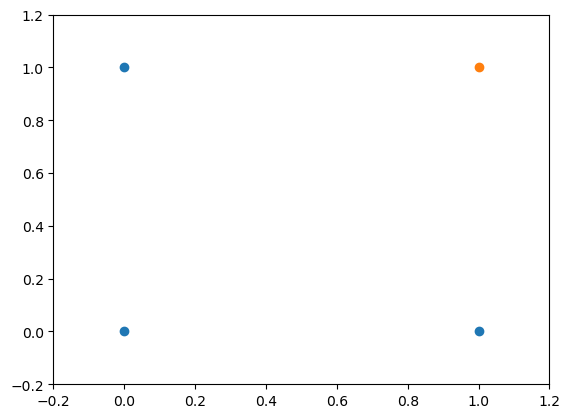

In [24]:
import matplotlib.pyplot as plt

x1 = [0, 0, 1]
y1 = [0, 1, 0]
x2 = [1]
y2 = [1]

fig, ax = plt.subplots()

ax.scatter(x1, y1)
ax.scatter(x2, y2)
# ax.plot(x3, y3)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)